In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances
from scipy.sparse import csr_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [81]:
data=pd.read_csv(f'C:/Users/16194/OneDrive - CSULB/Desktop/Portfolio/Redfin WebScrapping/Redfin_real_estate_analysis/data_Vancouver, BC_done.csv')
data

,price_list,Address,Type,City,Province,Postal Code,Number of Bedroom,Number of Bathroom,Square Ft
0,4988000,1238 Seymour St,Apartment,Vancouver,BC,V6B 6J3,7.0,6.5,6555
1,1399000,1316 Victoria Dr,Single House,Vancouver,BC,V5L 4G8,3.0,3.5,1154
2,4398000,846 E 27th Ave,Single House,Vancouver,BC,V5V 2L2,5.0,5.5,4349
3,559900,5665 Boundary Rd,Apartment,Vancouver,BC,V5R 0E4,1.0,1.0,515
4,2799000,1816 W 62nd Ave,Single House,Vancouver,BC,V6P 2G4,4.0,1.5,2241
...,...,...,...,...,...,...,...,...,...
4693,713000,1001 Richards St,Apartment,Vancouver,BC,V6B 1J6,1.0,1.0,601
4694,729000,602 Citadel Parade,Apartment,Vancouver,BC,V6B 1X2,1.0,1.0,624
4695,1329000,212 Davie St,Apartment,Vancouver,BC,V6B 5Z4,2.0,2.0,1222
4696,619000,668 Citadel Parade,Apartment,Vancouver,BC,V6B 1W6,1.0,1.0,502


In [82]:
#Rename column 
data=data.rename(columns={" price_list ":"Price"})
data

,Price,Address,Type,City,Province,Postal Code,Number of Bedroom,Number of Bathroom,Square Ft
0,4988000,1238 Seymour St,Apartment,Vancouver,BC,V6B 6J3,7.0,6.5,6555
1,1399000,1316 Victoria Dr,Single House,Vancouver,BC,V5L 4G8,3.0,3.5,1154
2,4398000,846 E 27th Ave,Single House,Vancouver,BC,V5V 2L2,5.0,5.5,4349
3,559900,5665 Boundary Rd,Apartment,Vancouver,BC,V5R 0E4,1.0,1.0,515
4,2799000,1816 W 62nd Ave,Single House,Vancouver,BC,V6P 2G4,4.0,1.5,2241
...,...,...,...,...,...,...,...,...,...
4693,713000,1001 Richards St,Apartment,Vancouver,BC,V6B 1J6,1.0,1.0,601
4694,729000,602 Citadel Parade,Apartment,Vancouver,BC,V6B 1X2,1.0,1.0,624
4695,1329000,212 Davie St,Apartment,Vancouver,BC,V6B 5Z4,2.0,2.0,1222
4696,619000,668 Citadel Parade,Apartment,Vancouver,BC,V6B 1W6,1.0,1.0,502


In [83]:
data.describe()

,Price,Number of Bedroom,Number of Bathroom,Square Ft
count,4.698000e+03,4698.000000,4698.000000,4698.000000
mean,1.958627e+06,2.719668,2.361643,1625.340145
std,2.185523e+06,1.676003,1.470458,1346.832569
min,2.150000e+05,1.000000,0.500000,317.000000
25%,7.980000e+05,1.000000,1.000000,749.250000
50%,1.348000e+06,2.000000,2.000000,1180.000000
75%,2.288800e+06,4.000000,3.000000,2010.000000
max,2.688800e+07,9.000000,10.000000,10510.000000


In [84]:
data.shape

(4698, 9)

In [85]:
data.dtypes

Price                   int64
Address                object
Type                   object
City                   object
Province               object
Postal Code            object
Number of Bedroom     float64
Number of Bathroom    float64
Square Ft               int64
dtype: object

In [86]:
#Checking null value
data.isnull().sum()

Price                 0
Address               0
Type                  0
City                  0
Province              0
Postal Code           0
Number of Bedroom     0
Number of Bathroom    0
Square Ft             0
dtype: int64

#Exploring Data

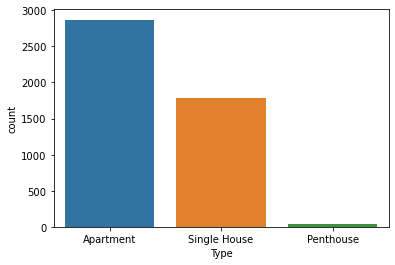

In [87]:
#Exploring Housing Type 
snsplot= sns.countplot(x='Type', data= data)

In [88]:
data['Type'].value_counts()

Apartment       2870
Single House    1784
Penthouse         44
Name: Type, dtype: int64

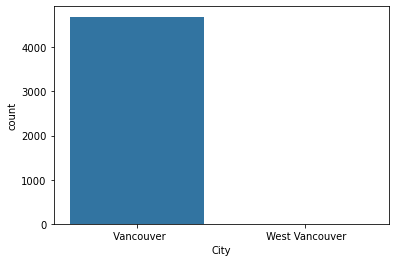

In [89]:
#Exploring City
snsplot= sns.countplot(x='City', data= data)

In [90]:
data['City'].value_counts()

 Vancouver         4694
 West Vancouver       4
Name: City, dtype: int64

Text(0.5, 1.0, 'Histogram of Number of Bedroom')

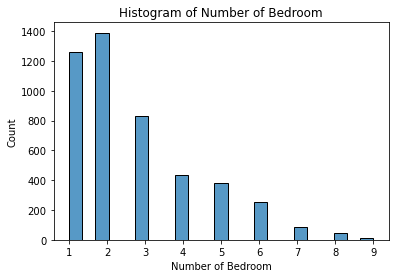

In [91]:
#Show Histogram of Number of Bedroom
snsplot2= sns.histplot(x= 'Number of Bedroom', data= data)
snsplot2.set_title("Histogram of Number of Bedroom")

Text(0.5, 1.0, 'Histogram of Number of Bathroom')

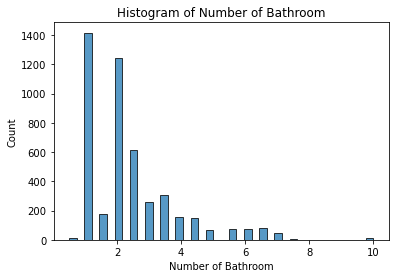

In [92]:
#Show Histogram of Number of Bedroom
snsplot2= sns.histplot(x= 'Number of Bathroom', data= data)
snsplot2.set_title("Histogram of Number of Bathroom")

Text(0.5, 1.0, 'Histogram of Price')

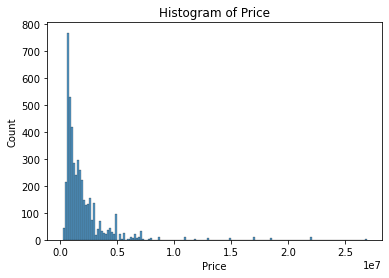

In [130]:
#Show Histogram of Price
snsplot2= sns.histplot(x= 'Price', data= data)
snsplot2.set_title("Histogram of Price")

In [93]:
#Correlation
data.corr()

,Price,Number of Bedroom,Number of Bathroom,Square Ft
Price,1.000000,0.539139,0.665655,0.845765
Number of Bedroom,0.539139,1.000000,0.837770,0.767517
Number of Bathroom,0.665655,0.837770,1.000000,0.838395
Square Ft,0.845765,0.767517,0.838395,1.000000


c:\Users\16194\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

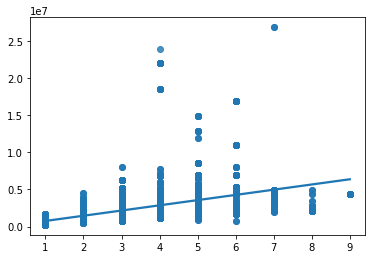

In [94]:
#Regression Graph b/t # of Bedroom and Price
x=data['Number of Bedroom'].tolist()
y=data['Price'].tolist()
sns.regplot(x, y, ci=None)

c:\Users\16194\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

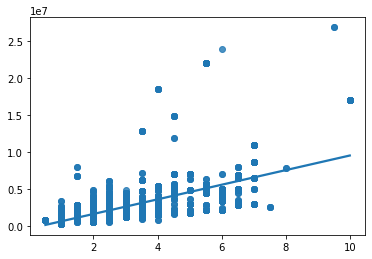

In [95]:
#Regression Graph b/t # of Bathroom and Price
x=data['Number of Bathroom'].tolist()
y=data['Price'].tolist()
sns.regplot(x, y, ci=None)

c:\Users\16194\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

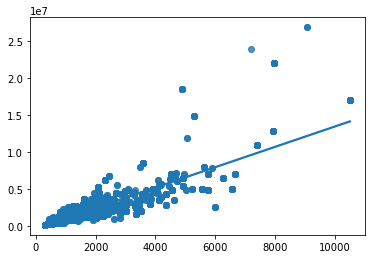

In [121]:
#Regression Graph b/t # of Bathroom and Price
x=data['Square Ft'].tolist()
y=data['Price'].tolist()
sns.regplot(x, y, ci=None)

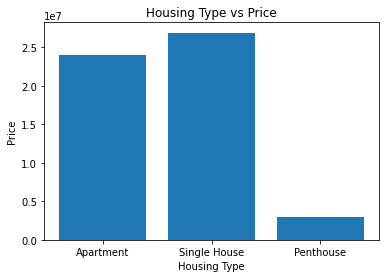

In [96]:
#Which housing type is more expensive compared to others?

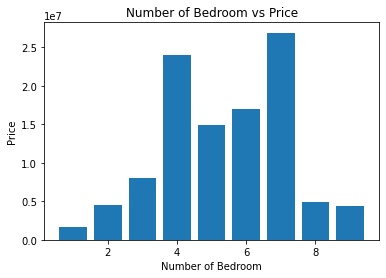

In [97]:
x=data['Number of Bedroom'].tolist()
y=data['Price'].tolist()

plt.bar(x,y)
plt.title('Number of Bedroom vs Price')
plt.xlabel('Number of Bedroom')
plt.ylabel('Price')
plt.show()